In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [2]:
global_temps_df = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv")
global_temps_state = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv")
global_temps_country = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv")
global_temps_city = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv")
global_temps_major_city = pd.read_csv("/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv")

EDA
=

In [3]:
def print_df_info(df_name, df):
    print(f"{df_name}: {df.shape}")
    df_cols = df.columns
    for col in df_cols:
        print(f"Number of NaN for {col}: {df[col].isna().sum()}")
        # print()

    print(f"Number of duplicate rows for {df_name}: {df.duplicated().sum()}")

In [4]:
print_df_info("global_temps_df", global_temps_df)

global_temps_df: (3192, 9)
Number of NaN for dt: 0
Number of NaN for LandAverageTemperature: 12
Number of NaN for LandAverageTemperatureUncertainty: 12
Number of NaN for LandMaxTemperature: 1200
Number of NaN for LandMaxTemperatureUncertainty: 1200
Number of NaN for LandMinTemperature: 1200
Number of NaN for LandMinTemperatureUncertainty: 1200
Number of NaN for LandAndOceanAverageTemperature: 1200
Number of NaN for LandAndOceanAverageTemperatureUncertainty: 1200
Number of duplicate rows for global_temps_df: 0


In [5]:
global_temps_df.head(2)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print_df_info("global_temps_state", global_temps_state)

global_temps_state: (645675, 5)
Number of NaN for dt: 0
Number of NaN for AverageTemperature: 25648
Number of NaN for AverageTemperatureUncertainty: 25648
Number of NaN for State: 0
Number of NaN for Country: 0
Number of duplicate rows for global_temps_state: 0


In [7]:
global_temps_state.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil


In [8]:
print_df_info("global_temps_country", global_temps_country)

global_temps_country: (577462, 4)
Number of NaN for dt: 0
Number of NaN for AverageTemperature: 32651
Number of NaN for AverageTemperatureUncertainty: 31912
Number of NaN for Country: 0
Number of duplicate rows for global_temps_country: 0


In [9]:
global_temps_country.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland


In [10]:
print_df_info("global_temps_city", global_temps_city)

global_temps_city: (8599212, 7)
Number of NaN for dt: 0
Number of NaN for AverageTemperature: 364130
Number of NaN for AverageTemperatureUncertainty: 364130
Number of NaN for City: 0
Number of NaN for Country: 0
Number of NaN for Latitude: 0
Number of NaN for Longitude: 0
Number of duplicate rows for global_temps_city: 0


In [11]:
global_temps_city.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [12]:
print_df_info("global_temps_major_city", global_temps_major_city)

global_temps_major_city: (239177, 7)
Number of NaN for dt: 0
Number of NaN for AverageTemperature: 11002
Number of NaN for AverageTemperatureUncertainty: 11002
Number of NaN for City: 0
Number of NaN for Country: 0
Number of NaN for Latitude: 0
Number of NaN for Longitude: 0
Number of duplicate rows for global_temps_major_city: 0


In [13]:
global_temps_major_city.head(2)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [14]:
global_temps_df["dt"] = pd.to_datetime(global_temps_df["dt"])
global_temps_df.rename(columns={"dt": "Date"}, inplace=True)

global_temps_state["dt"] = pd.to_datetime(global_temps_state["dt"])
global_temps_state.rename(columns={"dt": "Date"}, inplace=True)

global_temps_country["dt"] = pd.to_datetime(global_temps_country["dt"])
global_temps_country.rename(columns={"dt": "Date"}, inplace=True)

global_temps_city["dt"] = pd.to_datetime(global_temps_city["dt"])
global_temps_city.rename(columns={"dt": "Date"}, inplace=True)

global_temps_major_city["dt"] = pd.to_datetime(global_temps_major_city["dt"])
global_temps_major_city.rename(columns={"dt": "Date", "City": "Major City"}, inplace=True)

In [15]:
print(f"global_temps_df cols:\n{global_temps_df.columns}\n")
print(f"global_temps_state cols:\n{global_temps_state.columns}\n")
print(f"global_temps_country cols:\n{global_temps_country.columns}\n")
print(f"global_temps_city cols:\n{global_temps_city.columns}\n")
print(f"global_temps_major_city cols:\n{global_temps_major_city.columns}")

global_temps_df cols:
Index(['Date', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

global_temps_state cols:
Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

global_temps_country cols:
Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'Country'],
      dtype='object')

global_temps_city cols:
Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

global_temps_major_city cols:
Index(['Date', 'AverageTemperature', 'AverageTemperatureUncertainty',
       'Major City', 'Country', 'Latitude', 'Longitude'],
      dtype='object')


In [16]:
first_non_na_max_temp = global_temps_df["LandMaxTemperature"].first_valid_index()
print(f"First non NA max temp, min temp, and ocean temp:\n{global_temps_df.iloc[first_non_na_max_temp]}")

First non NA max temp, min temp, and ocean temp:
Date                                         1850-01-01 00:00:00
LandAverageTemperature                                     0.749
LandAverageTemperatureUncertainty                          1.105
LandMaxTemperature                                         8.242
LandMaxTemperatureUncertainty                              1.738
LandMinTemperature                                        -3.206
LandMinTemperatureUncertainty                              2.822
LandAndOceanAverageTemperature                            12.833
LandAndOceanAverageTemperatureUncertainty                  0.367
Name: 1200, dtype: object


all other dfs:
* AverageTemperature - all
* AverageTemperatureUncertainty - all
* State - global_temps_state
* Country - global_temps_state, global_temps_country, global_temps_city, global_temps_major_city
* City - global_temps_city, global_temps_major_city
* Latitude - global_temps_city, global_temps_major_city
* Longitude - global_temps_city, global_temps_major_city

There is no duplicate data, so we won't have to perform any deduplication. We will need to create data visualizations (boxplots) to see how we can handle the NaN value in case there are outliers/skew in our datasets

In [17]:
global_temps_state["State"].nunique()

241

Data Visualizations
=

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
global_temps_dict = {
    "State": global_temps_state,
    "Country": global_temps_country,
    "City": global_temps_city,
    "Major City": global_temps_major_city
}

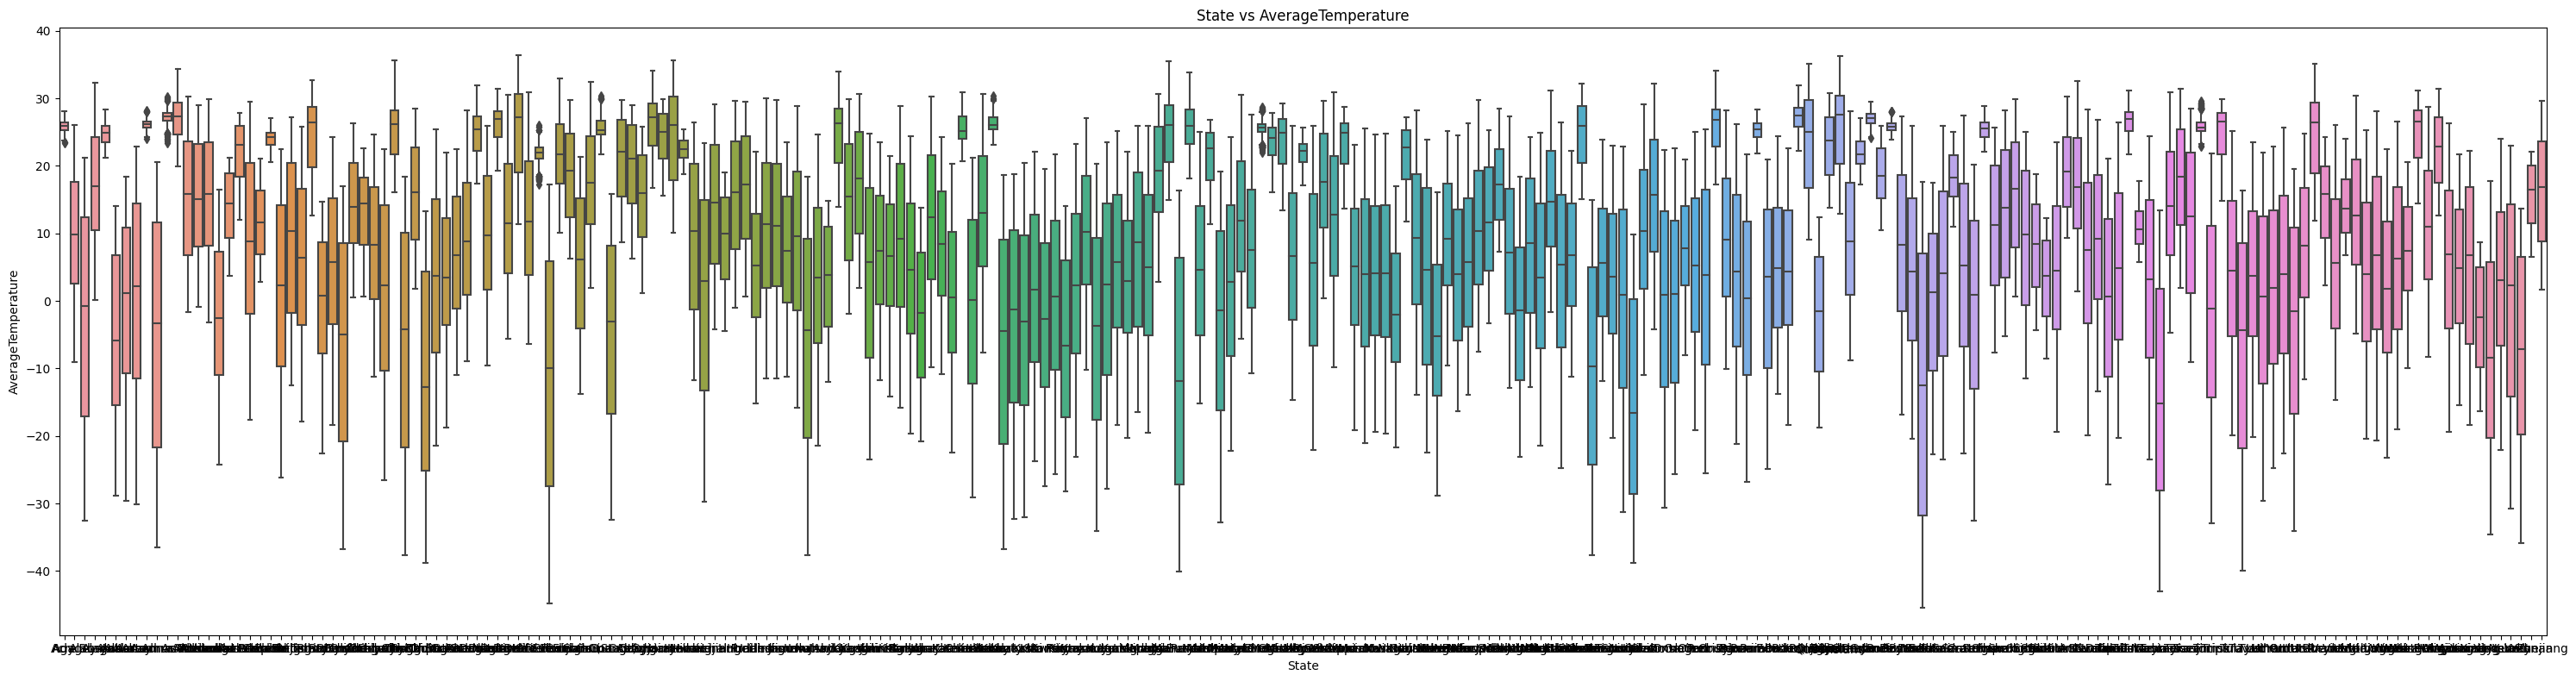

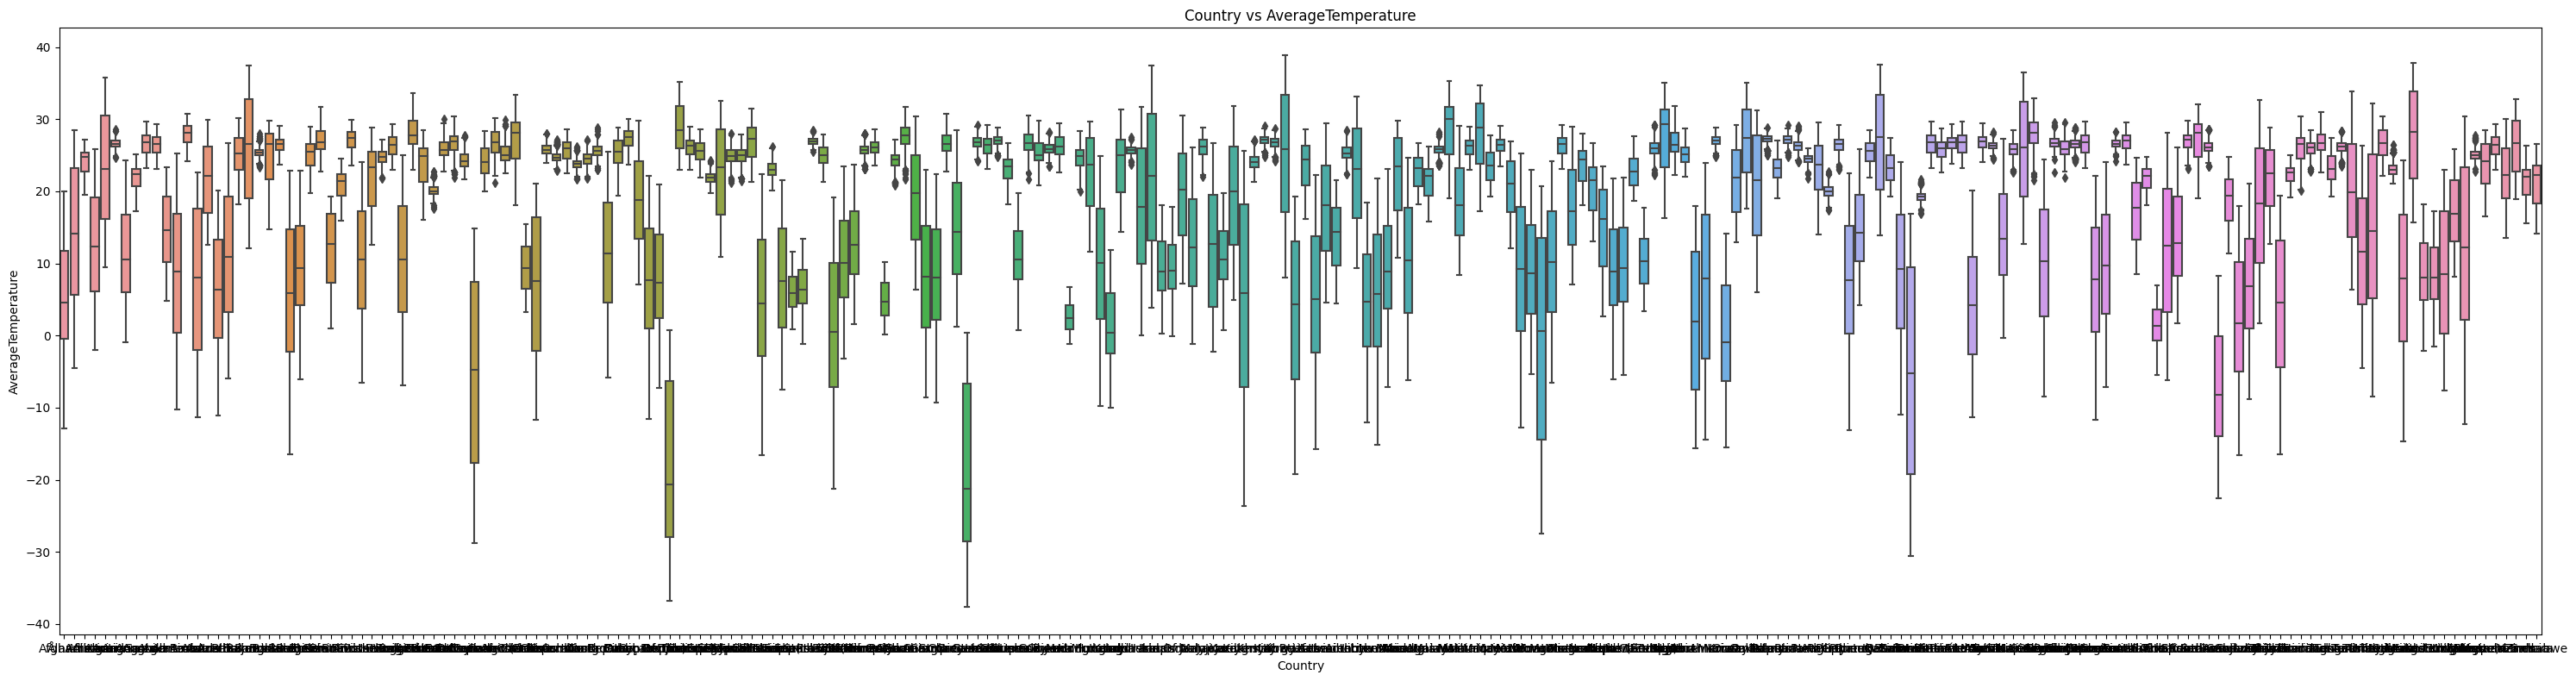

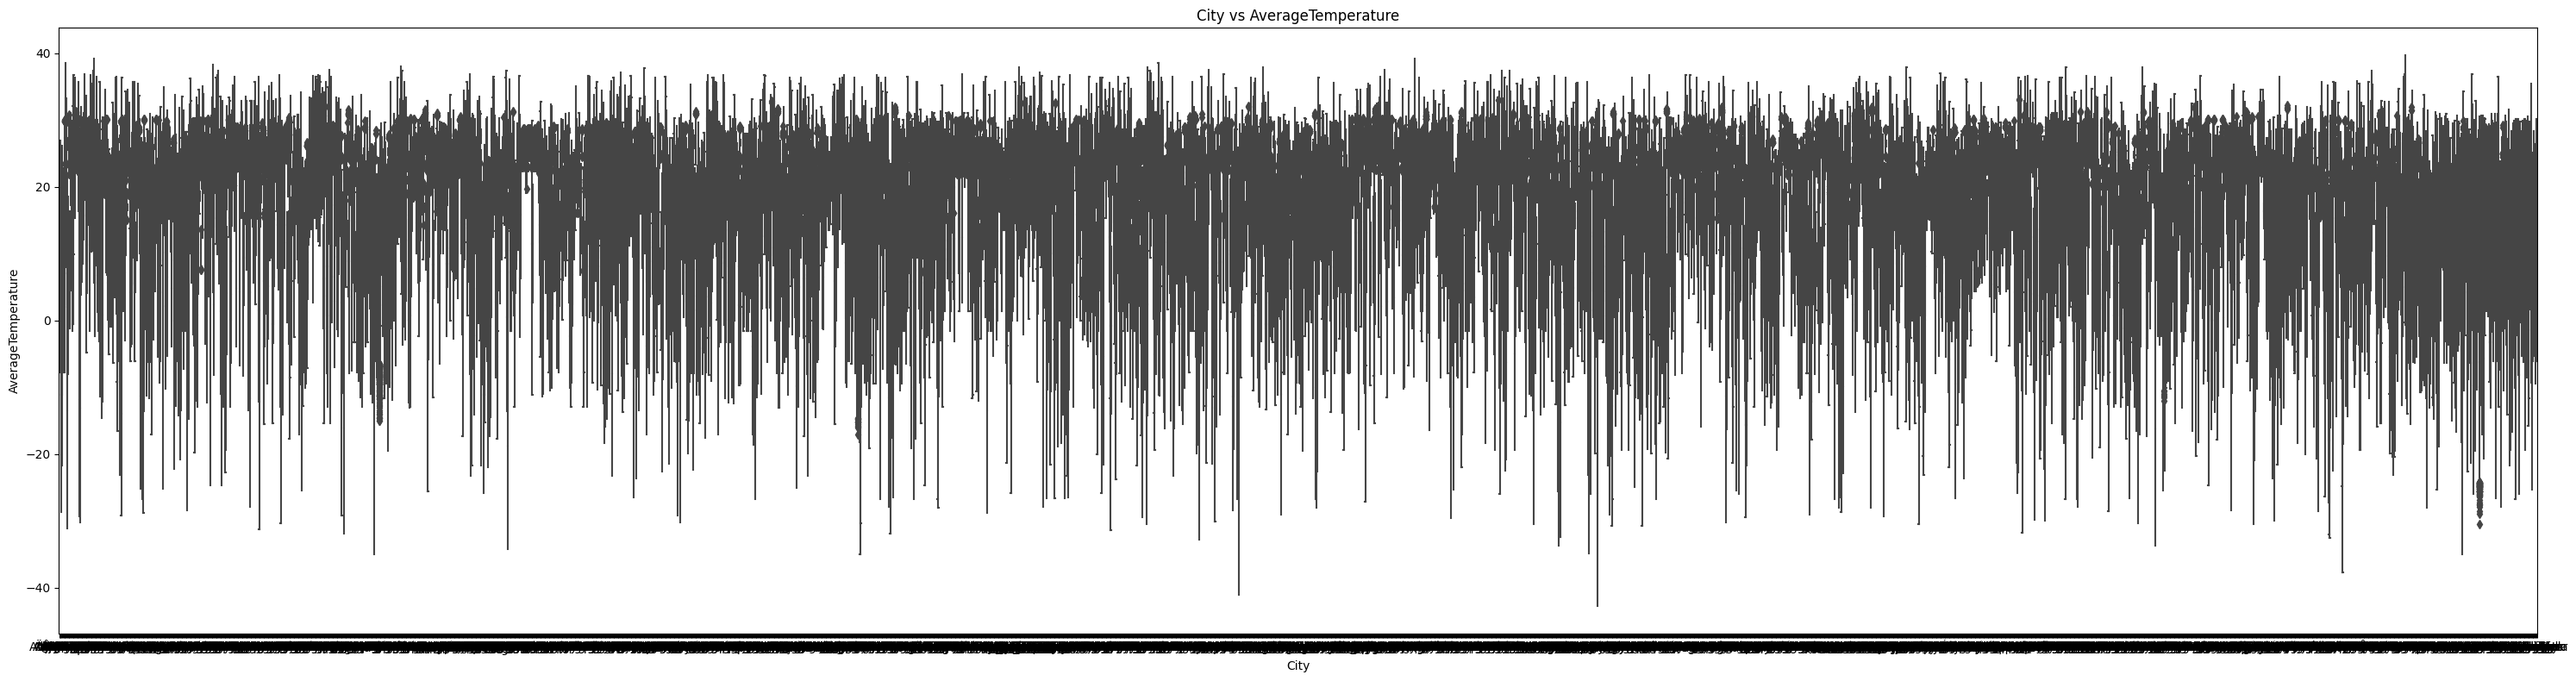

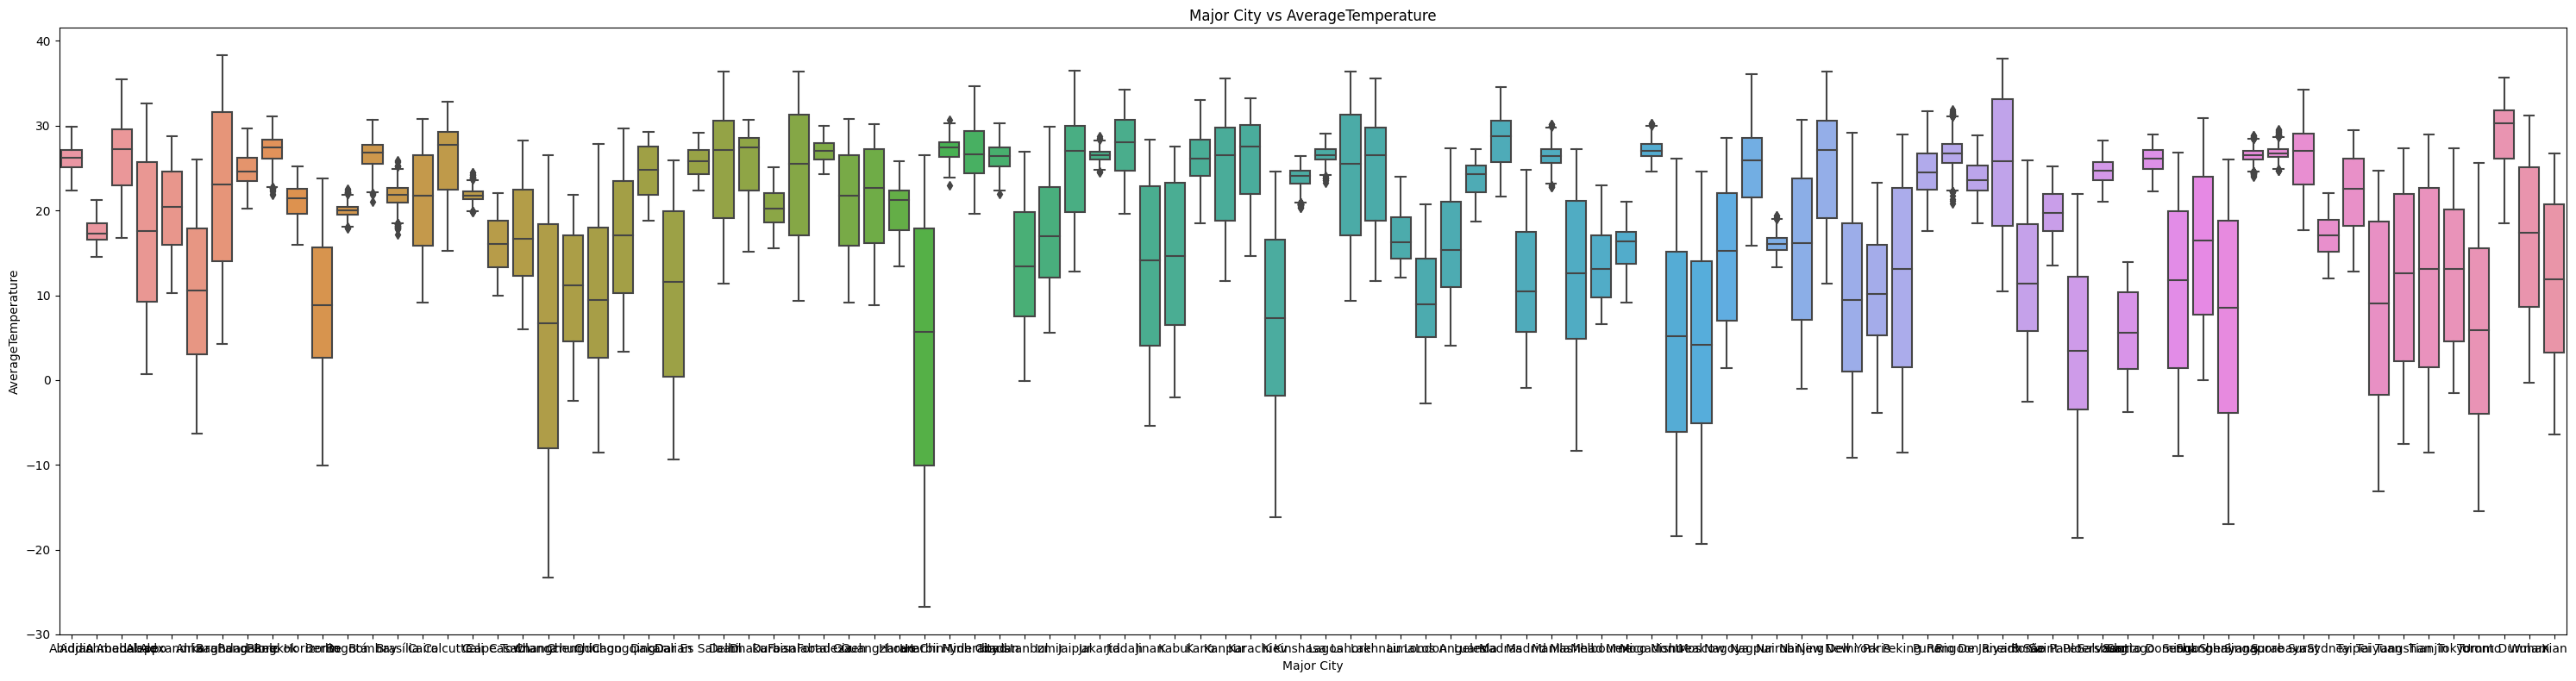

In [20]:
for key, value in global_temps_dict.items():
    plt.figure(figsize=(30,8))
    
    temps_df = value.dropna(axis=0)
    sns.boxplot(data=temps_df, x=key, y="AverageTemperature")

    plt.title(f"{key} vs AverageTemperature")
    plt.xlabel(key)
    plt.ylabel("AverageTemperature")
    plt.tight_layout()
    plt.show()

The boxplots above suggest that filling NaN values with the mean of AverageTemperature per group of each dataset would be appropriate. Though it is hard to tell for the global_temps_city dataframe. We can plot boxplots that have outliers to double check.

In [21]:
def get_outliers(grouped_df):
    outlier_keys_lst = []
    # key: A Coruña
    # group:
    #              Date  AverageTemperature  AverageTemperatureUncertainty  \
    # 14243  1743-11-01              10.779                          1.942   
    # 14248  1744-04-01              13.325                          2.137   
    for key, group in grouped_df:
        q1 = group["AverageTemperature"].quantile(0.25)
        q3 = group["AverageTemperature"].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr        
        
        outliers =  group[(group["AverageTemperature"] < lower) | (group["AverageTemperature"] > upper)]
        
        if not outliers.empty:
            outlier_keys_lst.append(key)
            
    return outlier_keys_lst

In [22]:
test_df = global_temps_city.dropna()
test_df_grouped = test_df.groupby("City")
outliers_lst = get_outliers(test_df_grouped)

In [23]:
# key:
# A Coruña
# group:
#              Date  AverageTemperature  AverageTemperatureUncertainty  \
# 14243  1743-11-01              10.779                          1.942   
# 14248  1744-04-01              13.325                          2.137   
# test_df_grouped = test_df.groupby("City")
# for key, group in test_df_grouped:
#     print(f"key:\n{key}")
#     print(f"group:\n{group['AverageTemperature']}")

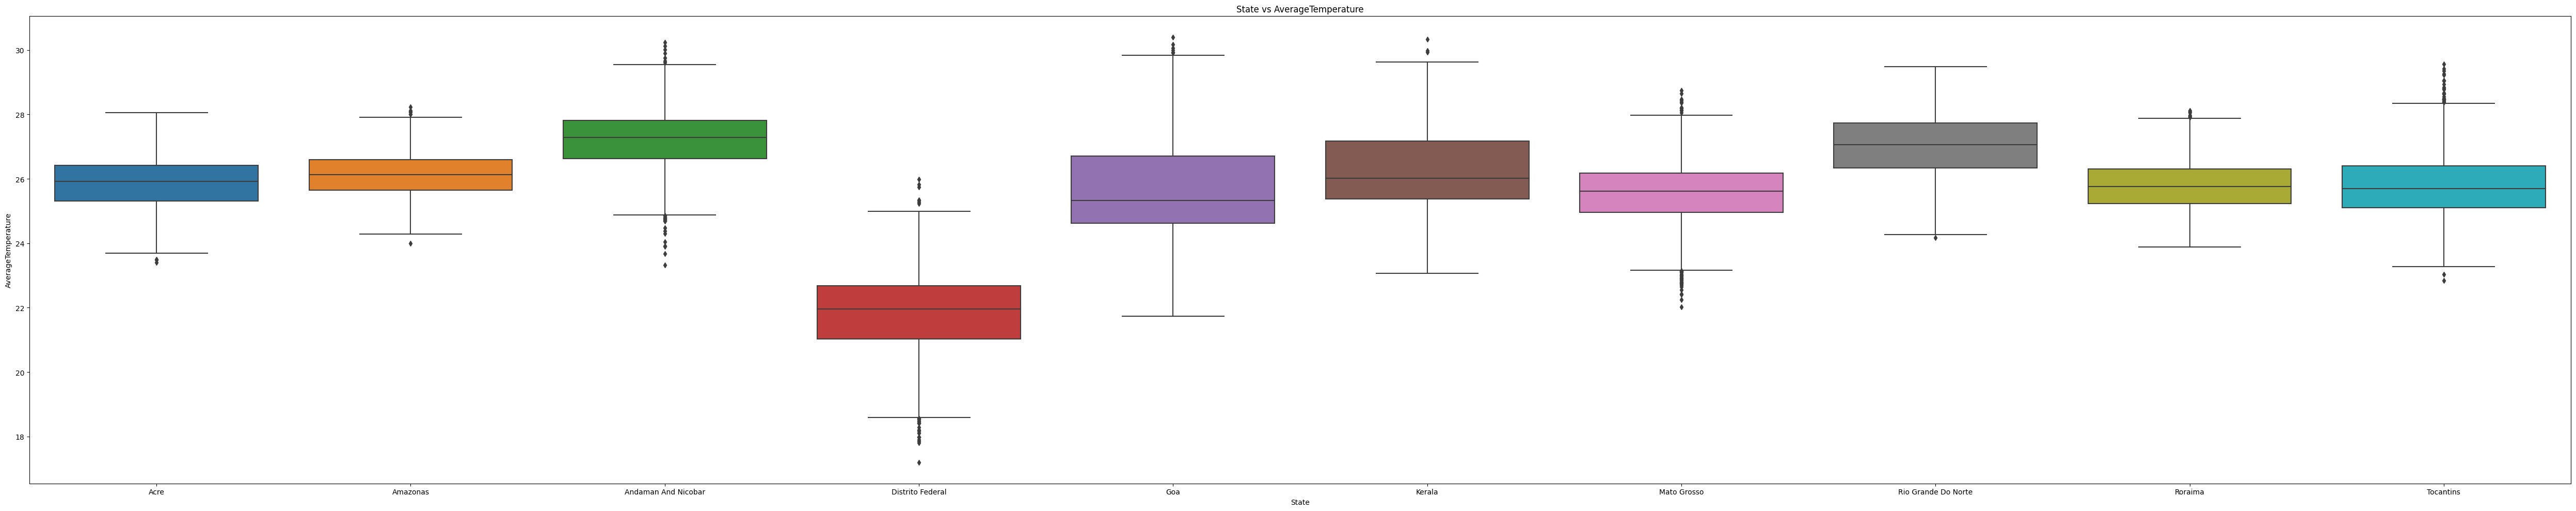

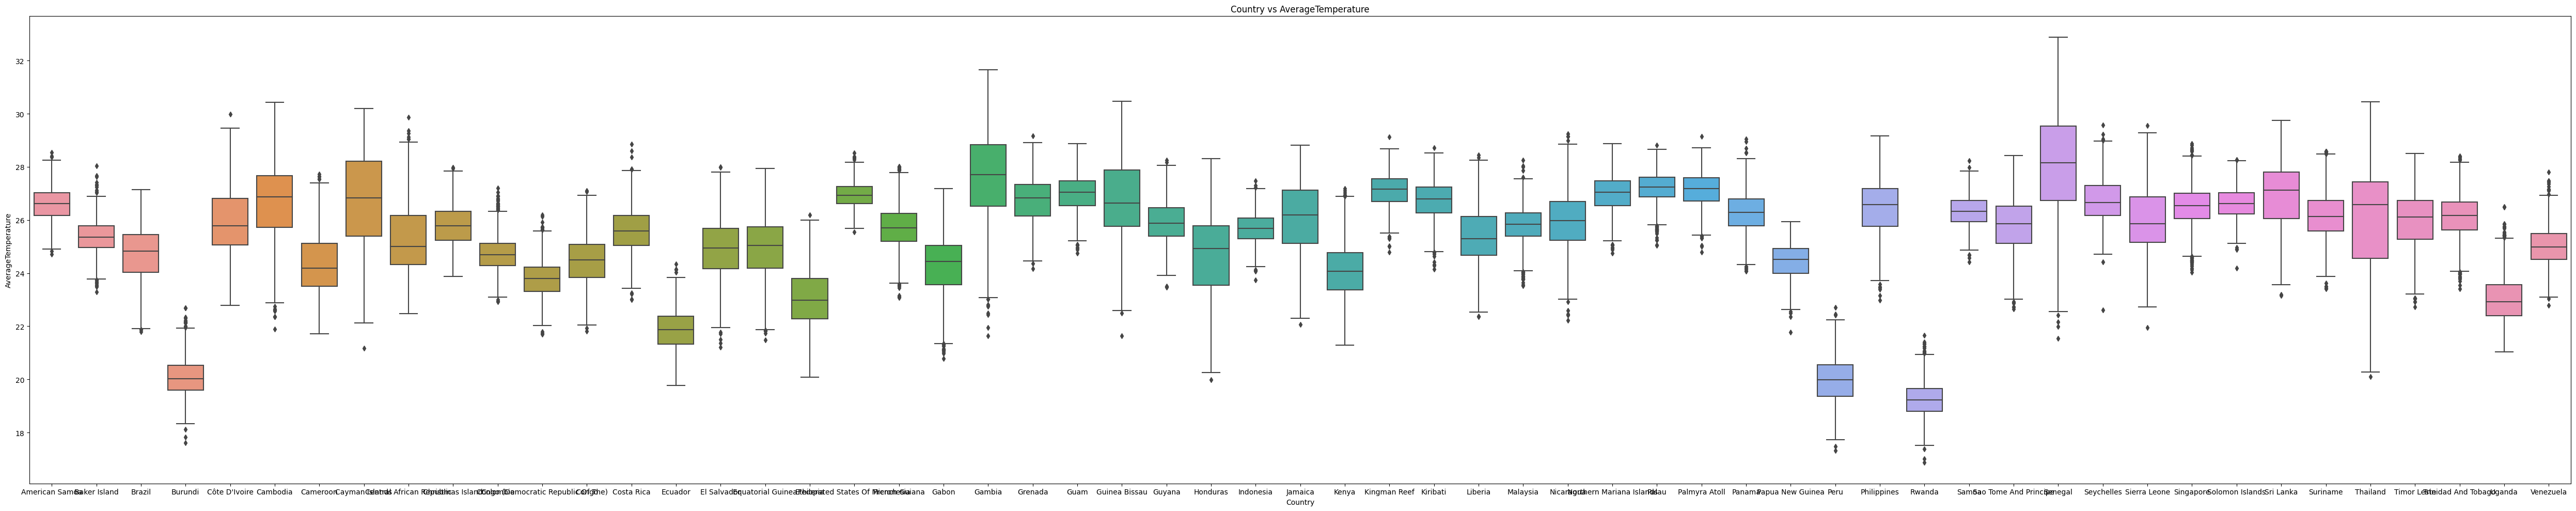

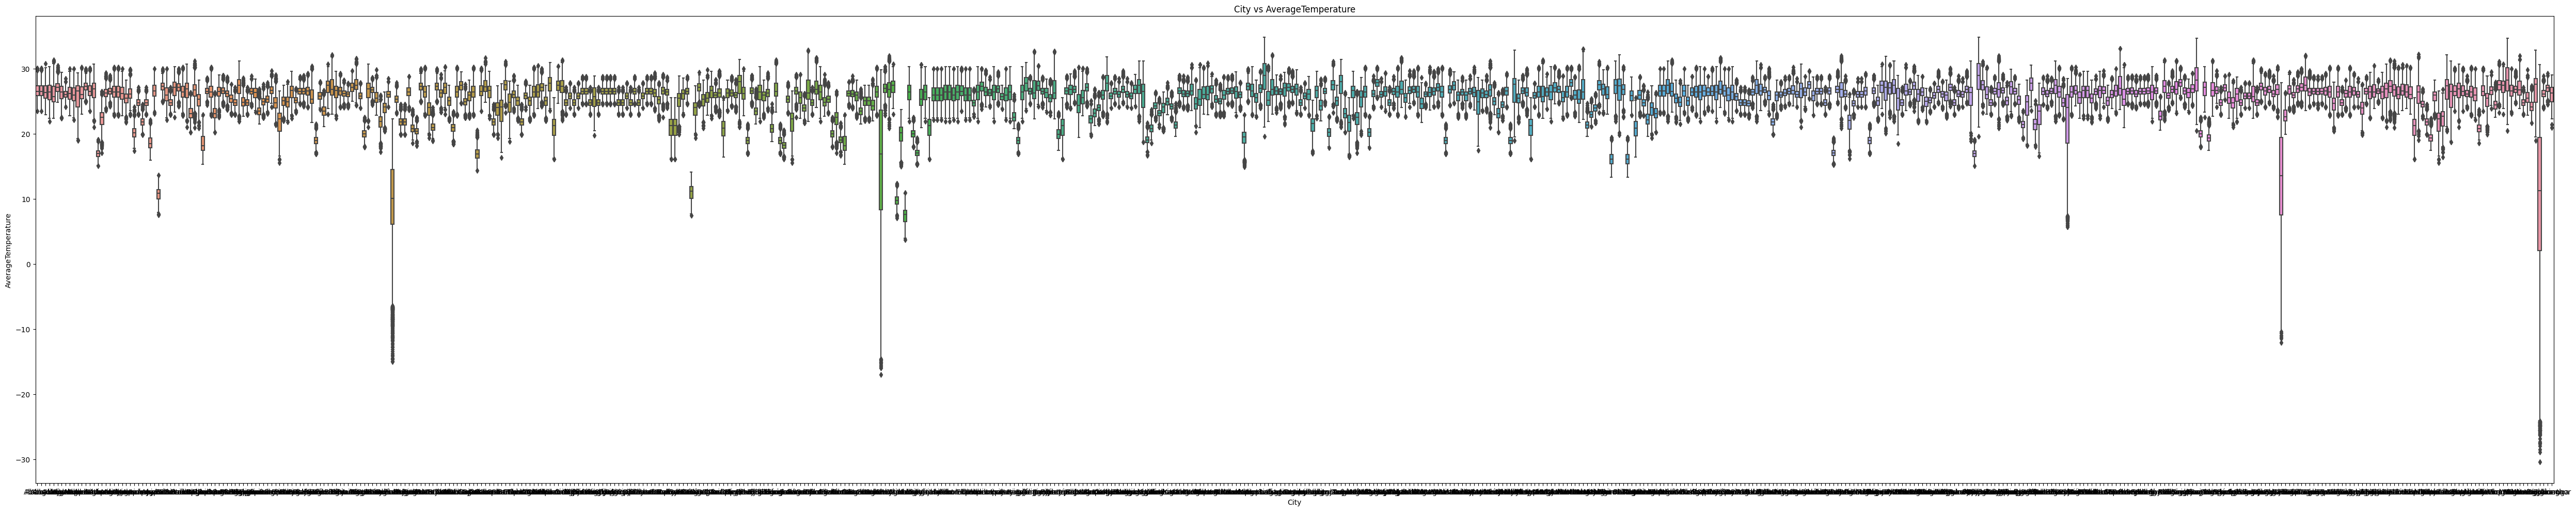

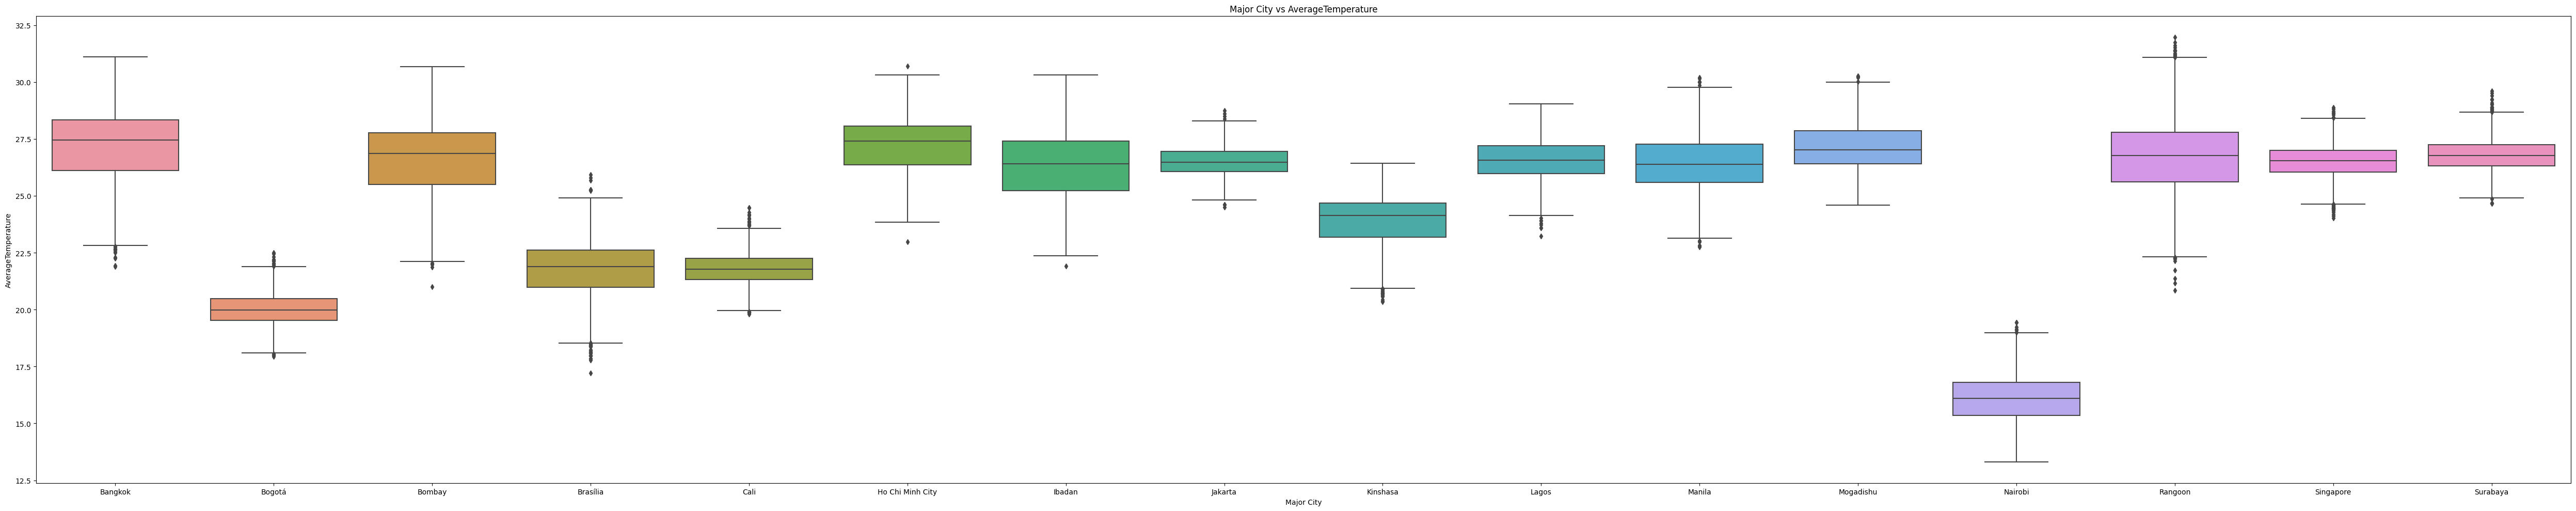

In [24]:
for key, value in global_temps_dict.items():
    plt.figure(figsize=(50,10))
    
    temps_df = value.dropna(axis=0)
    temps_df_grouped = temps_df.groupby(key)
    outliers_lst = get_outliers(temps_df_grouped)
    temps_df_outliers = temps_df.loc[temps_df[key].isin(outliers_lst)]
    
    sns.boxplot(data=temps_df_outliers, x=key, y="AverageTemperature")

    plt.title(f"{key} vs AverageTemperature")
    plt.xlabel(key)
    plt.ylabel("AverageTemperature")
    plt.tight_layout()
    plt.show()

The boxplots do not show skew, so we will continue to fill the NaN values with the mean AverageTemperature per group of a dataset.

In [25]:
for key, value in global_temps_dict.items():
    value["AverageTemperature"] = value.groupby(key)["AverageTemperature"].transform(lambda x: x.fillna(round(x.mean(), 3)))
    value["AverageTemperatureUncertainty"] = value.groupby(key)["AverageTemperatureUncertainty"].transform(lambda x: x.fillna(round(x.mean(), 3)))
    print(f"Number of NaN values for {key}:\n{value.isna().sum()}")

Number of NaN values for State:
Date                             0
AverageTemperature               0
AverageTemperatureUncertainty    0
State                            0
Country                          0
dtype: int64
Number of NaN values for Country:
Date                               0
AverageTemperature               764
AverageTemperatureUncertainty      0
Country                            0
dtype: int64
Number of NaN values for City:
Date                             0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64
Number of NaN values for Major City:
Date                             0
AverageTemperature               0
AverageTemperatureUncertainty    0
Major City                       0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


In [26]:
global_temps_country.loc[global_temps_country["AverageTemperature"].isna()]["Country"].unique()

array(['Antarctica'], dtype=object)

In [27]:
global_temps_country["AverageTemperature"].loc[global_temps_country["Country"] == "Antarctica"].unique()

array([nan])

Antaractica doesn't seem to have its AverageTemperatures recorded, so we will be dropping those rows.

In [28]:
antarctica_indexes = global_temps_country[global_temps_country["Country"] == "Antarctica"].index
global_temps_country.drop(antarctica_indexes, inplace=True)
global_temps_country.isna().sum()

Date                             0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [29]:
for key, value in global_temps_dict.items():
    value["Month"] = value["Date"].dt.month
    value["Year"] = value["Date"].dt.year

In [30]:
# global_temps_dict = {
#     "State": global_temps_state,
#     "Country": global_temps_country,
#     "City": global_temps_city,
#     "Major City": global_temps_major_city
# }
grouped_test = global_temps_city.groupby(["City", "Year"]).agg({
    "AverageTemperature": ["mean", "std", "min", "max"]
}).reset_index()
grouped_test.head(3)

City  Year AverageTemperature                          
                                mean       std     min     max
0  A Coruña  1743          11.963000  1.674429  10.779  13.147
1  A Coruña  1744          13.501083  2.425333   8.798  17.992
2  A Coruña  1745          11.821500  2.143272   7.652  13.147

Modeling
=

* ARIMA Modeling (forecasting)
* Regression modeling (linear, random forest, XGBoosting)

* Classification (Random Forest, KNN, SVM, XGBoosting). Predict category (city climate type, region, weather risk based on temperature trends). Label data (climate type, risk zone high, medium, low)

* Clustering (K-means). Group cities or regions w/ similar temperature patterns over time. Aggregate data per city, state, or country (monthly averages, seasonal amplitude)

What I've Learned
=